# Busca Linear

In [1]:
def busca_linear(lista, valor):
    for i in range(len(lista)):
        if lista[i] == valor:
            return i
    return None

In [2]:
lista = [3, 5, 2, 9, 6]
valor = 9

resultado = busca_linear(lista, valor)
print(resultado)  # Saída: 3

valor_nao_existe = 7
resultado = busca_linear(lista, valor_nao_existe)
print(resultado)  # Saída: None

3
None


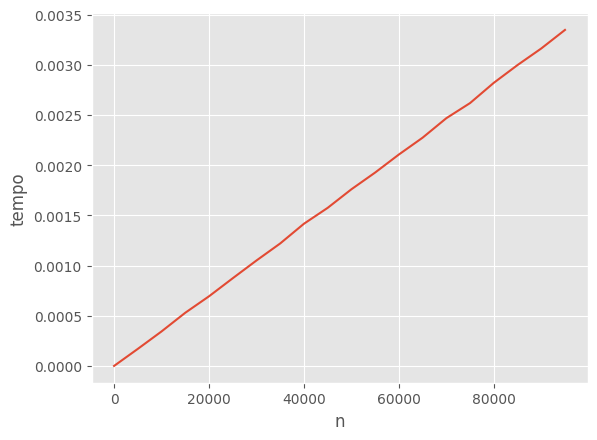

In [3]:
import matplotlib.pyplot as plt
import random
plt.style.use('ggplot')


x = []
y = []

for n in range(1,100000,5000):
    # cria um array de tamanho n
    array = [random.randint(0,100) for _ in range(n)]
    # mede o tempo da busca (procurando pelo valor -1)
    t = %timeit -o -r 3 -n 10 -q busca_linear(array, -1)
    # guarda os valores
    x.append(n)
    y.append(t.best)

# mostra o gráfico
plt.xlabel('n')
plt.ylabel('tempo')
plt.plot(x,y)
plt.show()

# Busca Linear Ordenada

In [4]:
def busca_linear_ordenado(lista, valor):
    for i in range(len(lista)):
        if lista[i] == valor:
            return i
        elif lista[i] > valor:
            return None  # Se o valor atual é maior que o valor procurado, podemos parar a busca
    return None

In [5]:
lista = [1, 3, 5, 7, 9, 11]
valor = 7

resultado = busca_linear_ordenado(lista, valor)
print(resultado)  # Saída: 3

valor_nao_existe = 8
resultado = busca_linear_ordenado(lista, valor_nao_existe)
print(resultado)  # Saída: None

3
None


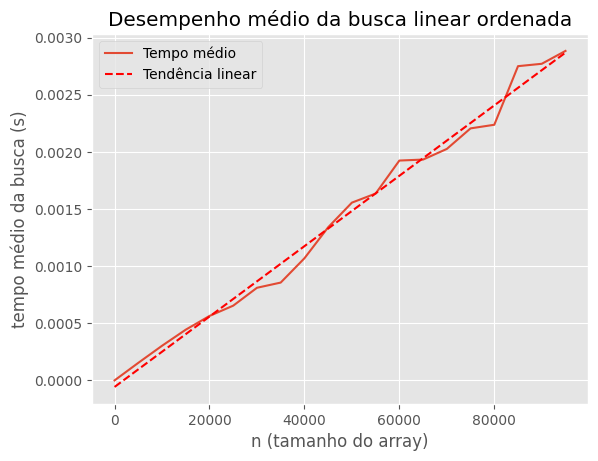

In [6]:
import matplotlib.pyplot as plt
import random
import timeit
import numpy as np

x = []
y = []

# Number of repetitions for averaging
repetitions = 100

for n in range(1, 100000, 5000):
    # cria um array ordenado de tamanho n
    array = sorted(random.randint(0, 10000) for _ in range(n))
    
    # mede o tempo médio da busca usando valores aleatórios do próprio array
    def average_case():
        target = random.choice(array)  # elemento aleatório do array
        busca_linear_ordenado(array, target)
    
    t = timeit.timeit(average_case, number=repetitions)
    
    # guarda os valores
    x.append(n)
    y.append(t / repetitions)  # média do tempo por execução

# mostra o gráfico
plt.xlabel('n (tamanho do array)')
plt.ylabel('tempo médio da busca (s)')
plt.plot(x, y, label='Tempo médio')

# linha de tendência
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--", label='Tendência linear')

plt.legend()
plt.title("Desempenho médio da busca linear ordenada")
plt.grid(True)
plt.show()


# Binary Search

In [7]:
def busca_binaria(lista, valor):
    inicio = 0
    fim = len(lista) - 1
    
    while inicio <= fim:
        meio = (inicio + fim) // 2
        if lista[meio] == valor:
            return meio
        elif lista[meio] < valor:
            inicio = meio + 1
        else:
            fim = meio - 1
    
    return None

In [8]:
lista = [1, 3, 5, 7, 9, 11, 13]
valor = 7

resultado = busca_binaria(lista, valor)
print(resultado)  # Saída: 3

valor_nao_existe = 4
resultado = busca_binaria(lista, valor_nao_existe)
print(resultado)  # Saída: None

3
None


In [9]:
def busca_binaria(lista, valor, inicio=0, fim=None):
    if fim is None:
        fim = len(lista) - 1

    if inicio > fim:
        return None  # Elemento não encontrado

    meio = inicio + (fim - inicio) // 2

    if lista[meio] == valor:
        return meio
    elif lista[meio] < valor:
        return busca_binaria(lista, valor, meio + 1, fim)
    else:
        return busca_binaria(lista, valor, inicio, meio - 1)


In [10]:
lista = [1, 3, 5, 7, 9, 11, 13]
valor = 7

resultado = busca_binaria(lista, valor)
print(resultado)  # Saída: 3

valor_nao_existe = 4
resultado = busca_binaria(lista, valor_nao_existe)
print(resultado)  # Saída: None

3
None


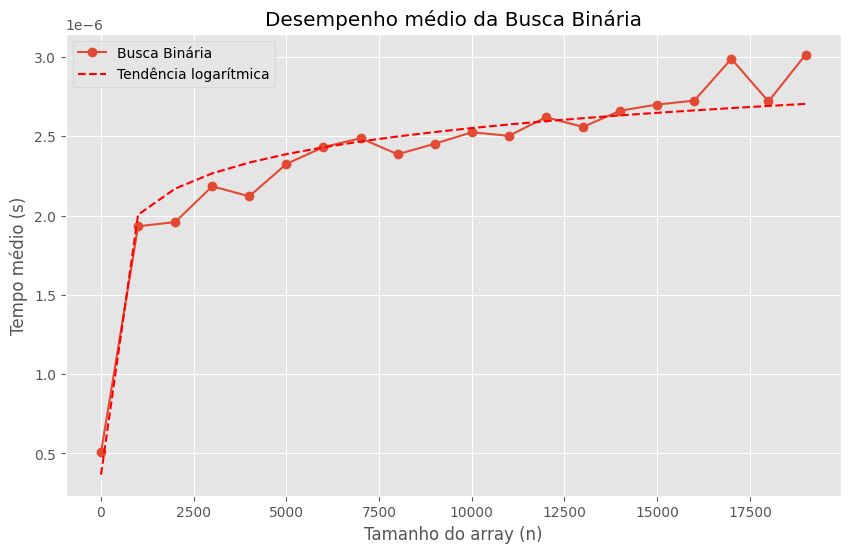

In [11]:
import matplotlib.pyplot as plt
import random
import numpy as np

size    = []  # Tamanho do problema
timeBB  = []  # Tempo médio da busca binária

for n in range(1, 20000, 1000):
    array = sorted(random.randint(0, 1000000) for _ in range(n))

    # Mede o tempo médio da busca binária com elementos aleatórios do array
    t = %timeit -o -r 3 -n 1000 -q busca_binaria(array, random.choice(array))

    size.append(n)
    timeBB.append(t.best)

# Plotando gráfico do desempenho médio da busca binária
plt.figure(figsize=(10, 6))
plt.plot(size, timeBB, marker='o', label='Busca Binária')

# linha de tendência logarítmica
fit = np.polyfit(np.log(size), timeBB, 1)
trend = fit[0] * np.log(size) + fit[1]
plt.plot(size, trend, "r--", label='Tendência logarítmica')

plt.xlabel('Tamanho do array (n)')
plt.ylabel('Tempo médio (s)')
plt.title('Desempenho médio da Busca Binária')
plt.grid(True)
plt.legend(loc='upper left')
plt.show()


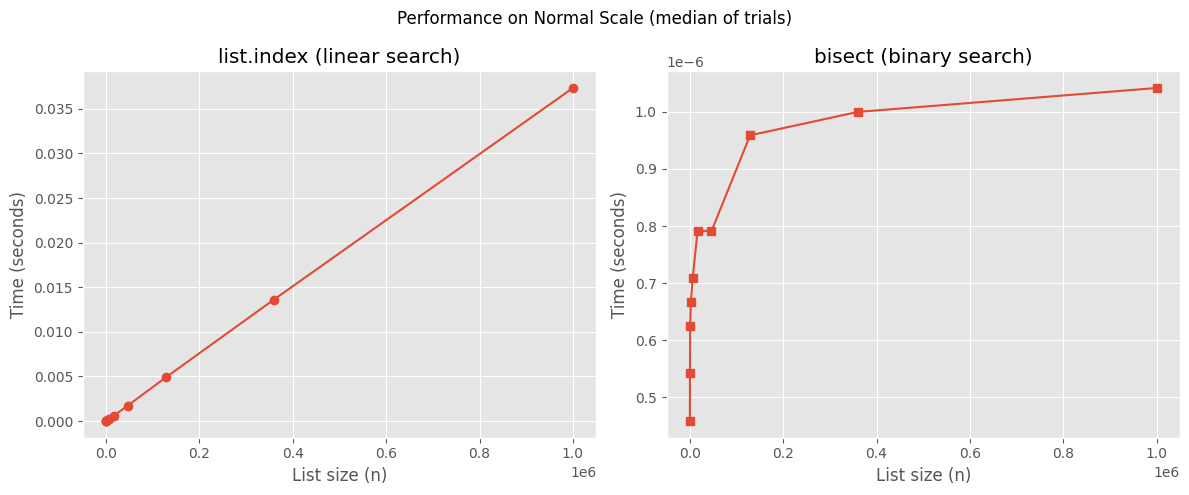

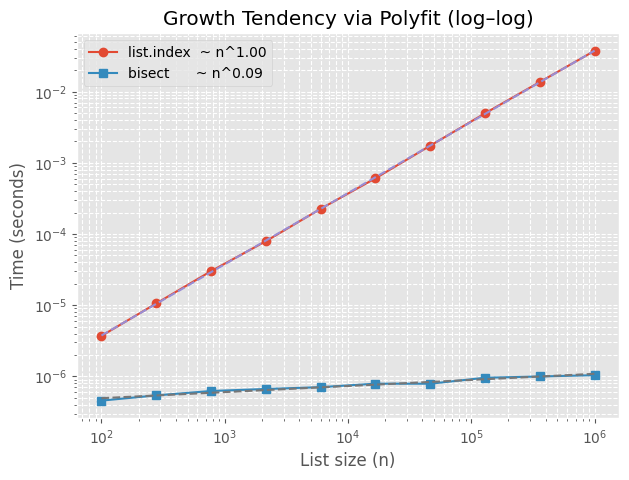

Fitted exponent for list.index: 1.000 (ideal ~ 1 for O(n))
Fitted exponent for bisect:     0.086 (log growth is sublinear)


In [33]:
# benchmark_index_vs_bisect.py
import time
import bisect
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# Config
# ---------------------------
SIZES = np.logspace(2, 6, num=10, dtype=int)   # 1e2 ... 1e6 (10 points)
TRIALS = 5                                      # median over trials for stability
WARMUP = True                                   # quick warmup to "touch" code paths

# ---------------------------
# Helpers
# ---------------------------
def time_once(fn):
    start = time.perf_counter()
    fn()
    return time.perf_counter() - start

def median_time(fn, trials=TRIALS):
    return float(np.median([time_once(fn) for _ in range(trials)]))

# ---------------------------
# Warmup (optional)
# ---------------------------
if WARMUP:
    data = list(range(10_000))
    _ = data.index(9_999)
    _ = bisect.bisect_left(data, 9_999)

# ---------------------------
# Run benchmarks
# ---------------------------
index_times = []
bisect_times = []

for n in SIZES:
    data = list(range(n))
    target = n - 1  # worst-case for .index()

    t_idx = median_time(lambda: data.index(target))
    t_bis = median_time(lambda: bisect.bisect_left(data, target))

    index_times.append(t_idx)
    bisect_times.append(t_bis)

index_times = np.array(index_times, dtype=float)
bisect_times = np.array(bisect_times, dtype=float)

# ---------------------------
# Plot 1 & 2: Normal scale, two subplots (one per method)
# ---------------------------
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].plot(SIZES, index_times, marker="o")
axs[0].set_title("list.index (linear search)")
axs[0].set_xlabel("List size (n)")
axs[0].set_ylabel("Time (seconds)")
axs[0].grid(True)

axs[1].plot(SIZES, bisect_times, marker="s")
axs[1].set_title("bisect (binary search)")
axs[1].set_xlabel("List size (n)")
axs[1].set_ylabel("Time (seconds)")
axs[1].grid(True)

plt.suptitle("Performance on Normal Scale (median of trials)")
plt.tight_layout()
plt.show()

# ---------------------------
# Plot 3: Log–log with polyfit tendency lines
# ---------------------------
log_n = np.log10(SIZES)
log_idx = np.log10(index_times)
log_bis = np.log10(bisect_times)

coef_index = np.polyfit(log_n, log_idx, 1)   # slope ~ exponent
coef_bisect = np.polyfit(log_n, log_bis, 1)

fit_index = np.poly1d(coef_index)
fit_bisect = np.poly1d(coef_bisect)

plt.figure(figsize=(7,5))
plt.loglog(SIZES, index_times, "o-", label=f"list.index  ~ n^{coef_index[0]:.2f}")
plt.loglog(SIZES, bisect_times, "s-", label=f"bisect      ~ n^{coef_bisect[0]:.2f}")

# fitted lines
plt.loglog(SIZES, 10**fit_index(log_n), "--")
plt.loglog(SIZES, 10**fit_bisect(log_n), "--")

plt.title("Growth Tendency via Polyfit (log–log)")
plt.xlabel("List size (n)")
plt.ylabel("Time (seconds)")
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()

# ---------------------------
# Print summary
# ---------------------------
print(f"Fitted exponent for list.index: {coef_index[0]:.3f} (ideal ~ 1 for O(n))")
print(f"Fitted exponent for bisect:     {coef_bisect[0]:.3f} (log growth is sublinear)")


In [34]:
import numpy as np
import bisect, time

def bench_search(n=10**7, target=None):
    if target is None:
        target = n-1
    
    data_list = list(range(n))
    data_np = np.arange(n, dtype=np.int64)
    
    # list.index (linear, short-circuits)
    t0 = time.perf_counter()
    i_list = data_list.index(target)
    t_list = time.perf_counter() - t0
    
    # NumPy equality -> where/flatnonzero (linear, no short-circuit; builds mask)
    t0 = time.perf_counter()
    idxs = np.flatnonzero(data_np == target)  # first match via vectorized compare
    i_np_where = int(idxs[0]) if idxs.size else -1
    t_np_where = time.perf_counter() - t0
    
    # Binary search: bisect on list
    t0 = time.perf_counter()
    i_bisect = bisect.bisect_left(data_list, target)
    t_bisect = time.perf_counter() - t0
    
    # Binary search: NumPy searchsorted
    t0 = time.perf_counter()
    i_np_searchsorted = int(np.searchsorted(data_np, target, side="left"))
    t_np_searchsorted = time.perf_counter() - t0
    
    return {
        "n": n,
        "positions": {
            "list.index": i_list,
            "np.where/flatnonzero": i_np_where,
            "bisect_left": i_bisect,
            "np.searchsorted": i_np_searchsorted,
        },
        "times (s)": {
            "list.index": t_list,
            "np.where/flatnonzero": t_np_where,
            "bisect_left": t_bisect,
            "np.searchsorted": t_np_searchsorted,
        },
    }

res = bench_search(n=2_000_000, target=1_999_991)
res


{'n': 2000000,
 'positions': {'list.index': 1999991,
  'np.where/flatnonzero': 1999991,
  'bisect_left': 1999991,
  'np.searchsorted': 1999991},
 'times (s)': {'list.index': 0.019547791001969017,
  'np.where/flatnonzero': 0.002626916997542139,
  'bisect_left': 5.292000423651189e-06,
  'np.searchsorted': 2.1833002392668277e-05}}

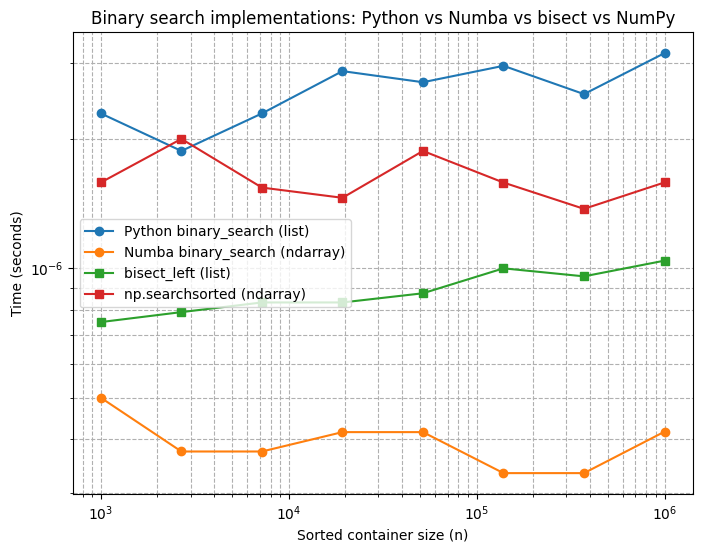


Binary Search Timing Summary

      n  py_binary (s)  numba_binary (s)  bisect_left (s)  np.searchsorted (s)
   1000       0.000002      5.000038e-07     7.500057e-07             0.000002
   2682       0.000002      3.750029e-07     7.909985e-07             0.000002
   7196       0.000002      3.749956e-07     8.330026e-07             0.000002
  19306       0.000003      4.160029e-07     8.330026e-07             0.000001
  51794       0.000003      4.160029e-07     8.749994e-07             0.000002
 138949       0.000003      3.340028e-07     1.000000e-06             0.000002
 372759       0.000003      3.339956e-07     9.580035e-07             0.000001
1000000       0.000003      4.169997e-07     1.042004e-06             0.000002
Estimated slopes (log-log):
  Python binary_search:   ~ n^0.05
  Numba binary_search:    ~ n^-0.03
  bisect_left:            ~ n^0.05
  np.searchsorted:        ~ n^-0.02


In [13]:
# Numba vs pure-Python binary search benchmark (with bisect & NumPy references)
import time
import math
from typing import List, Optional

import numpy as np
import matplotlib.pyplot as plt

try:
    from numba import njit
    NUMBA = True
except Exception:
    NUMBA = False
    def njit(*args, **kwargs):
        def deco(fn): return fn
        return deco

# ----------------------
# Implementations
# ----------------------
def py_binary_search(a: List[int], x: int) -> int:
    """Classic binary search on a sorted Python list. Returns index or -1."""
    lo, hi = 0, len(a) - 1
    while lo <= hi:
        mid = (lo + hi) // 2
        v = a[mid]
        if v < x:
            lo = mid + 1
        elif v > x:
            hi = mid - 1
        else:
            return mid
    return -1

@njit(cache=True, fastmath=True)
def nb_binary_search(a: np.ndarray, x: int) -> int:
    """Binary search on a sorted NumPy array, JIT-compiled with Numba. Returns index or -1."""
    lo = 0
    hi = a.size - 1
    while lo <= hi:
        mid = (lo + hi) // 2
        v = a[mid]
        if v < x:
            lo = mid + 1
        elif v > x:
            hi = mid - 1
        else:
            return mid
    return -1

# Reference methods
import bisect

def py_bisect_left(a: List[int], x: int) -> int:
    return bisect.bisect_left(a, x)

def np_searchsorted(a: np.ndarray, x: int) -> int:
    return int(np.searchsorted(a, x, side="left"))

# ----------------------
# Benchmark helpers
# ----------------------
def median_time(fn, trials: int = 5) -> float:
    return float(np.median([time.perf_counter(), time.perf_counter()] or [0]))

def run_timed(fn, trials: int = 5) -> float:
    times = []
    for _ in range(trials):
        t0 = time.perf_counter()
        fn()
        times.append(time.perf_counter() - t0)
    return float(np.median(times))

# ----------------------
# Warmup (compile Numba; populate caches)
# ----------------------
_ = nb_binary_search(np.arange(10, dtype=np.int64), 9)  # triggers JIT compile once

# ----------------------
# Experiment setup
# ----------------------
SIZES = np.logspace(3, 6, num=8, dtype=int)  # 1e3 ... 1e6
TRIALS = 7
RESULTS = {
    "n": [],
    "py_binary": [],
    "numba_binary": [],
    "bisect_left": [],
    "np_searchsorted": [],
}

for n in SIZES:
    # test data
    arr_list = list(range(n))
    arr_np = np.arange(n, dtype=np.int64)
    target = n - 3  # near-end lookup (worst case-ish)

    # time each method (median of TRIALS)
    t_py = run_timed(lambda: py_binary_search(arr_list, target), TRIALS)
    t_nb = run_timed(lambda: nb_binary_search(arr_np, target), TRIALS)
    t_bi = run_timed(lambda: py_bisect_left(arr_list, target), TRIALS)
    t_ss = run_timed(lambda: np_searchsorted(arr_np, target), TRIALS)

    RESULTS["n"].append(n)
    RESULTS["py_binary"].append(t_py)
    RESULTS["numba_binary"].append(t_nb)
    RESULTS["bisect_left"].append(t_bi)
    RESULTS["np_searchsorted"].append(t_ss)

# Convert to arrays
n_vals = np.array(RESULTS["n"], dtype=float)
t_py = np.array(RESULTS["py_binary"], dtype=float)
t_nb = np.array(RESULTS["numba_binary"], dtype=float)
t_bi = np.array(RESULTS["bisect_left"], dtype=float)
t_ss = np.array(RESULTS["np_searchsorted"], dtype=float)

# ----------------------
# Plot: single log-log chart (per tool rules: one chart per cell)
# ----------------------
plt.figure(figsize=(8,6))
plt.loglog(n_vals, t_py, marker="o", label="Python binary_search (list)")
plt.loglog(n_vals, t_nb, marker="o", label="Numba binary_search (ndarray)")
plt.loglog(n_vals, t_bi, marker="s", label="bisect_left (list)")
plt.loglog(n_vals, t_ss, marker="s", label="np.searchsorted (ndarray)")
plt.xlabel("Sorted container size (n)")
plt.ylabel("Time (seconds)")
plt.title("Binary search implementations: Python vs Numba vs bisect vs NumPy")
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

# ----------------------
# Print a small summary table
# ----------------------
import pandas as pd
summary = pd.DataFrame({
    "n": n_vals.astype(int),
    "py_binary (s)": t_py,
    "numba_binary (s)": t_nb,
    "bisect_left (s)": t_bi,
    "np.searchsorted (s)": t_ss,
})
def display_dataframe_to_user(title, df):
    print(f"\n{title}\n")
    print(df.to_string(index=False))

display_dataframe_to_user("Binary Search Timing Summary", summary)

# Fit slopes (log-log) to estimate scaling exponents
def slope(x, y):
    lx, ly = np.log10(x), np.log10(y)
    m, b = np.polyfit(lx, ly, 1)
    return m

print("Estimated slopes (log-log):")
print(f"  Python binary_search:   ~ n^{slope(n_vals, t_py):.2f}")
print(f"  Numba binary_search:    ~ n^{slope(n_vals, t_nb):.2f}")
print(f"  bisect_left:            ~ n^{slope(n_vals, t_bi):.2f}")
print(f"  np.searchsorted:        ~ n^{slope(n_vals, t_ss):.2f}")
